In [1]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageFont, ImageDraw
import random
from multiprocessing import Process
import gc
import sys
import pickle

./download/╫ю╚л╗к╬─╫╓╠х┤Є░№/╗к╬─╧╕║┌/╗к╬─╧╕║┌.ttf


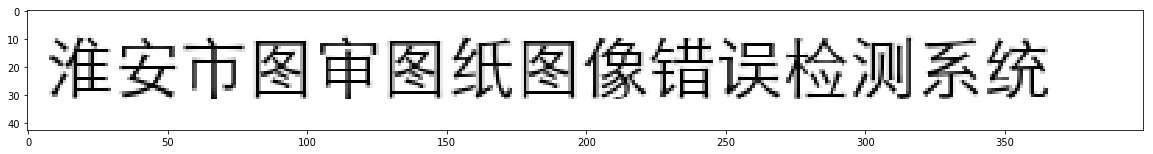

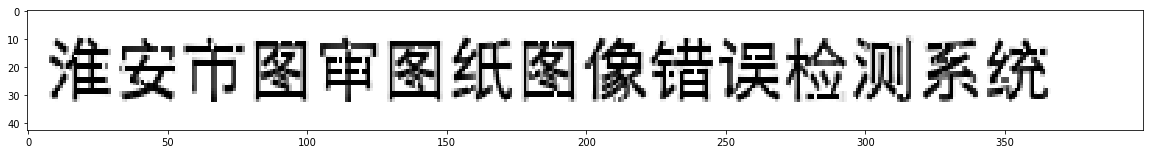

./download/╫ю╚л╗к╬─╫╓╠х┤Є░№/╗к╬─╓╨╦╬/╗к╬─╓╨╦╬.ttf


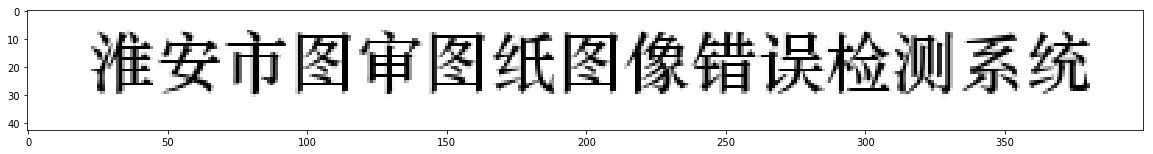

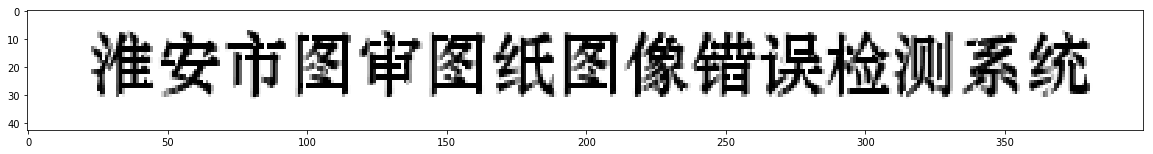

./download/╫ю╚л╗к╬─╫╓╠х┤Є░№/╗к╬─╖┬╦╬/╗к╬─╖┬╦╬.ttf


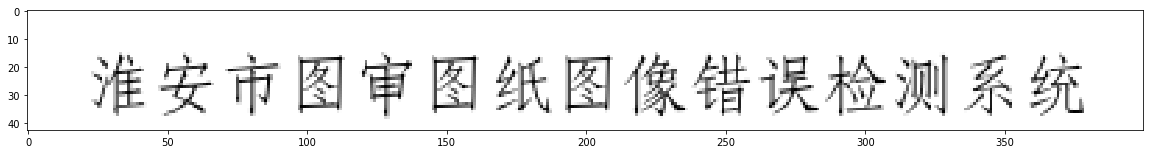

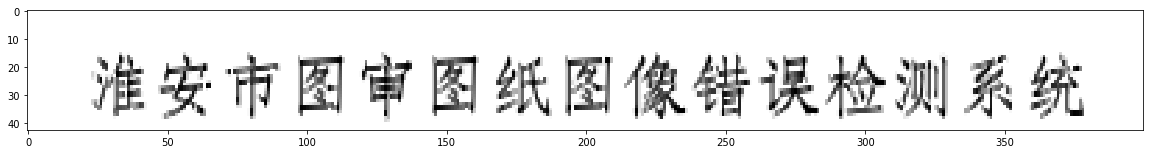

./download/simsun.ttf


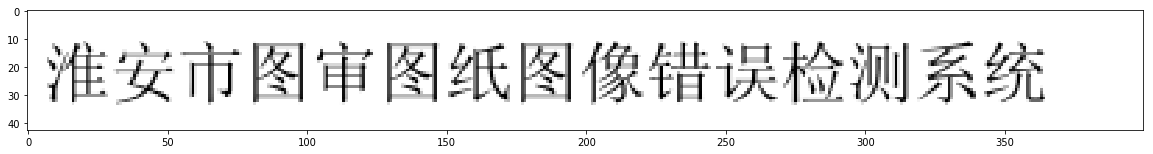

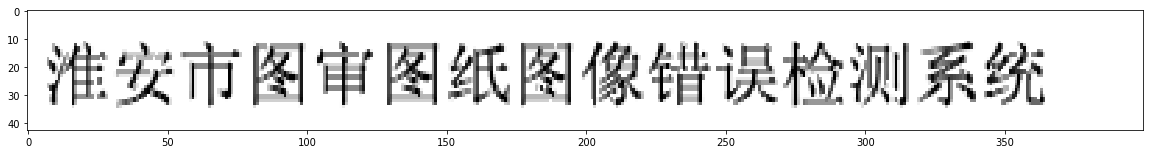

ttf/【HOPE】凌惠.ttf


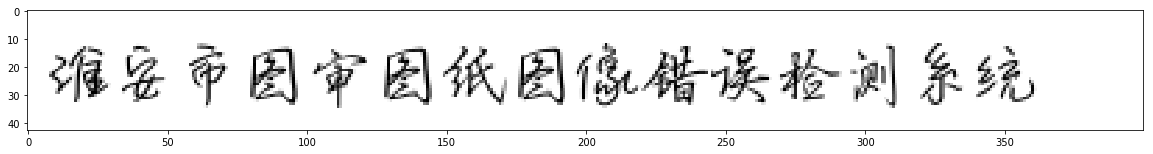

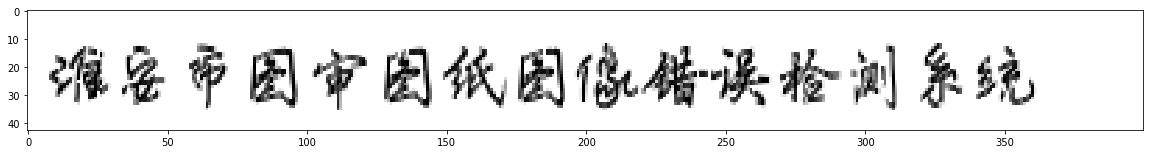

ttf/中山行书字体.ttf


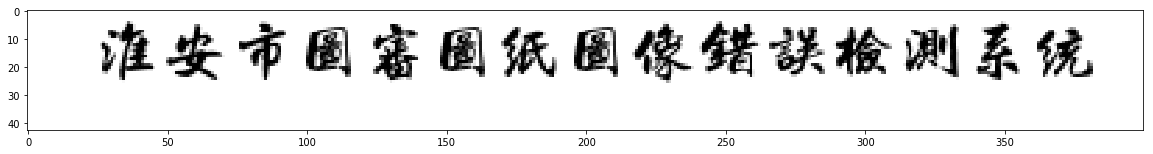

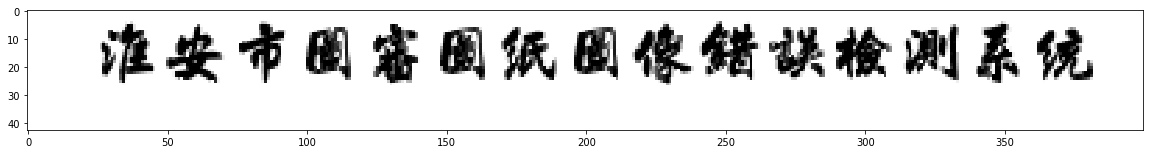

ttf/书体坊兰亭体.ttf


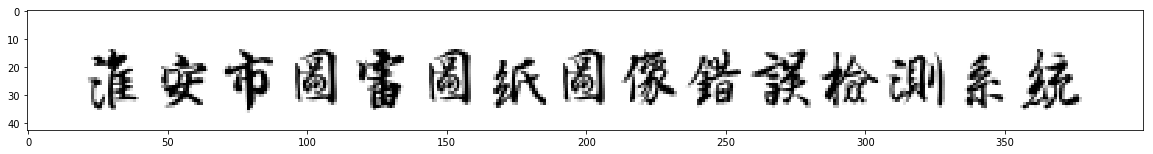

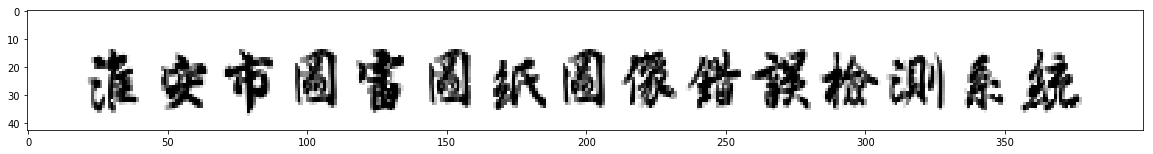

ttf/优雅连笔字体.ttf


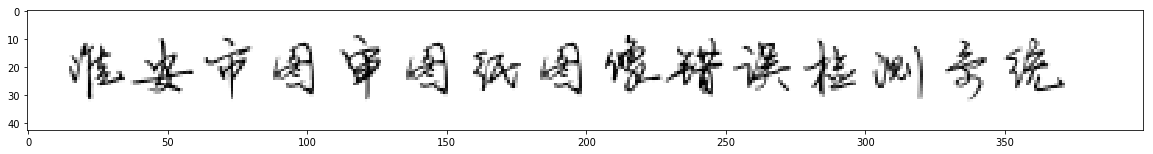

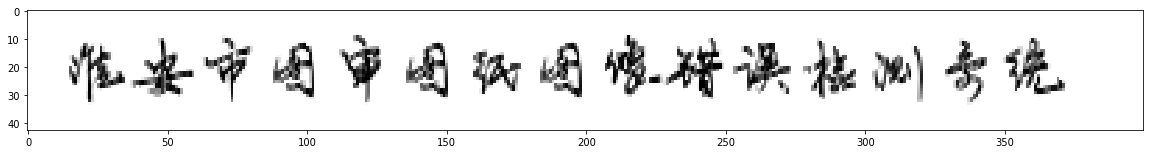

ttf/华文细黑.TTF


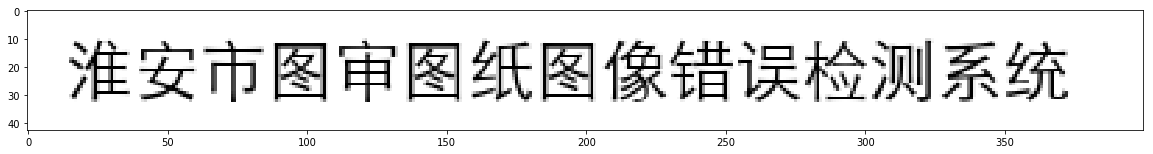

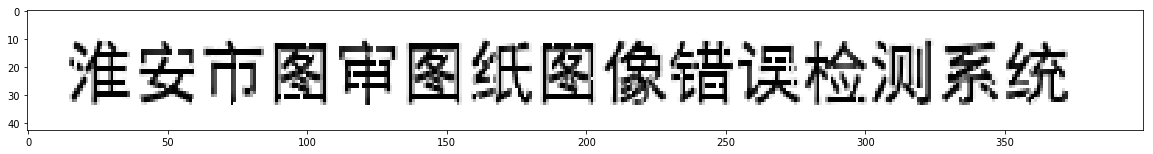

ttf/叶根友毛笔行书.ttf


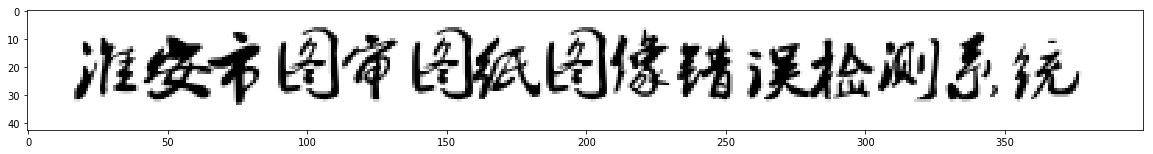

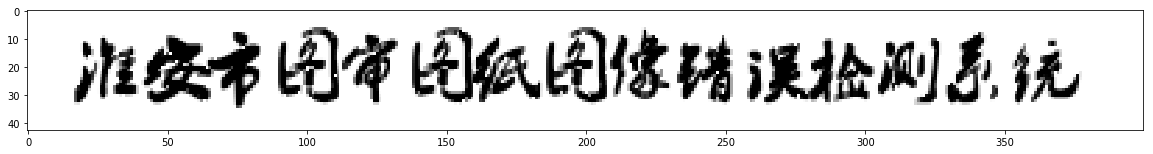

ttf/庞中华行书.ttf


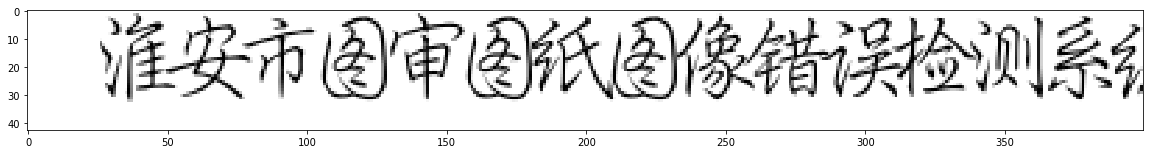

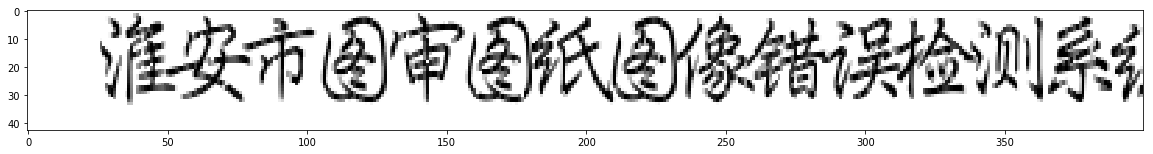

ttf/建刚体粗体修正版.ttf


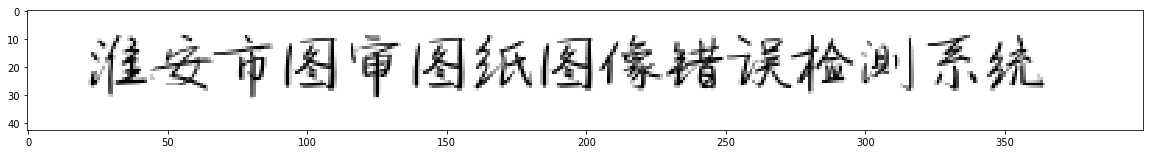

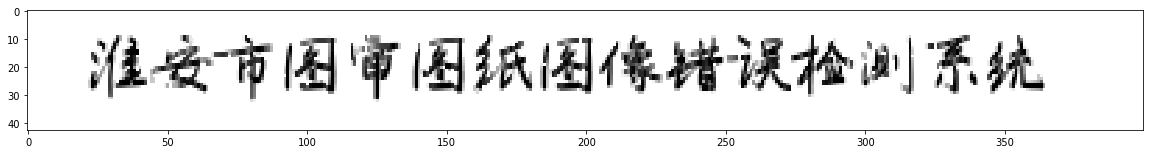

ttf/建刚字库徐明简体.ttf


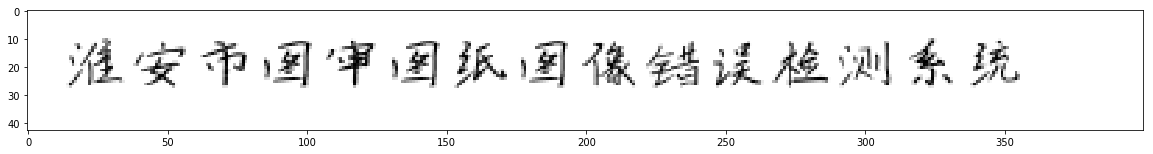

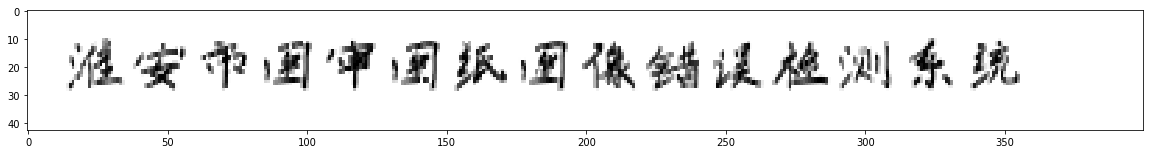

ttf/微软正粗黑体 Bold.ttf


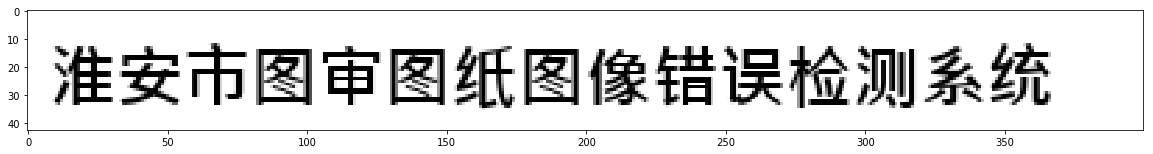

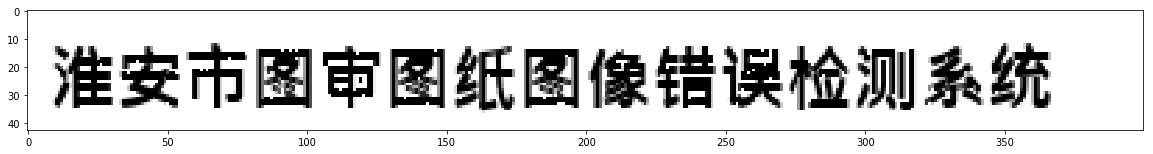

ttf/微软正黑.ttf


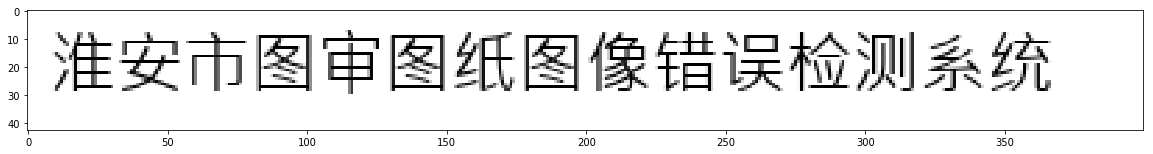

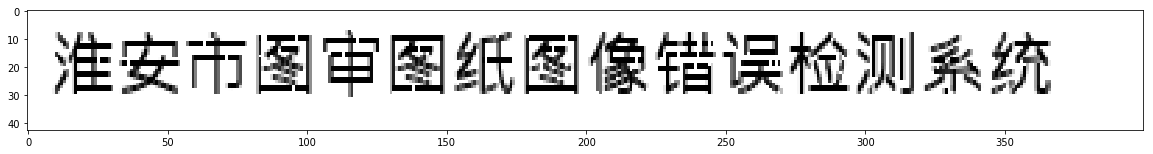

ttf/微软雅黑.ttf


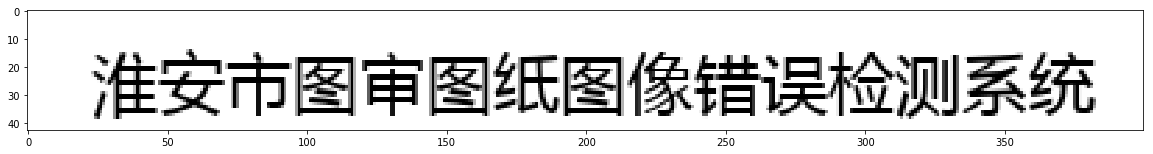

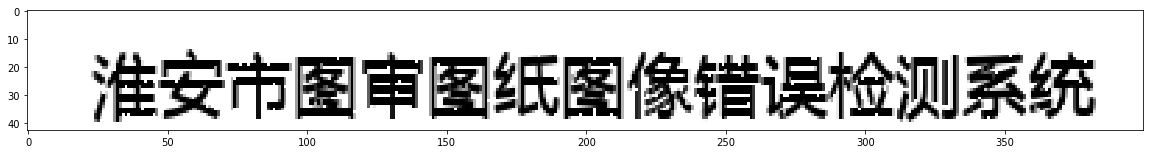

ttf/微软雅黑粗.ttf


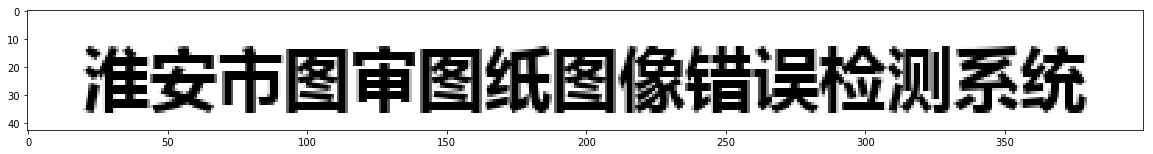

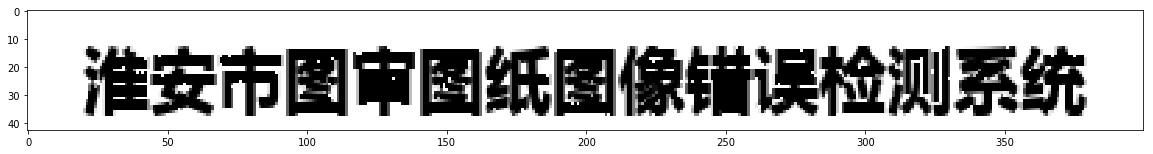

ttf/微软雅黑繁简完全版.ttf


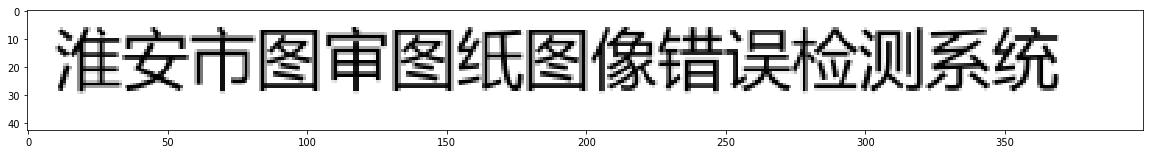

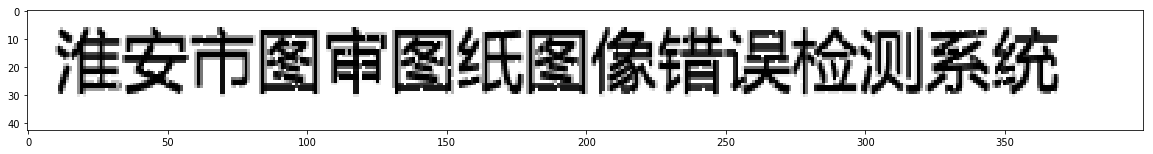

ttf/新帝下午茶（白金版）.ttf


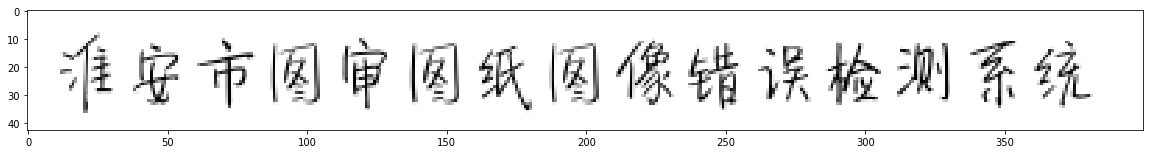

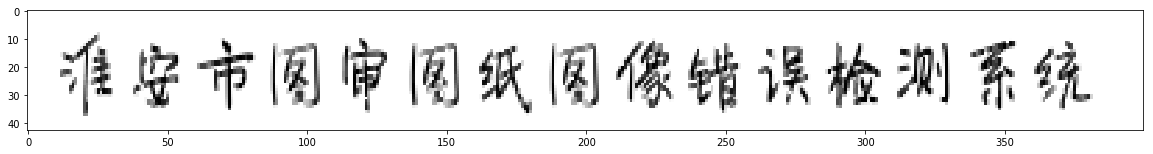

ttf/方圆疾风草书.ttf


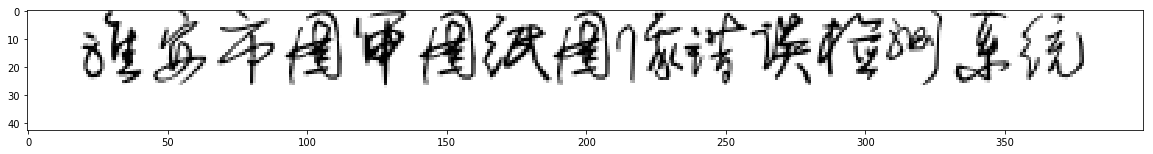

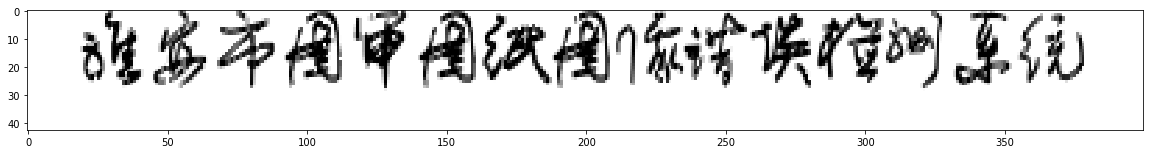

ttf/方圆钢笔粉笔字.ttf


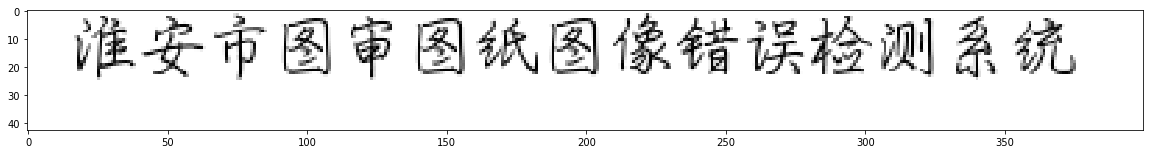

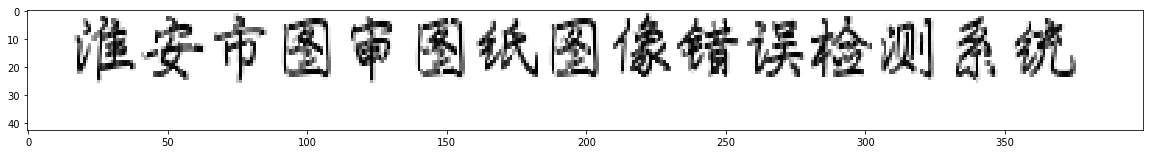

ttf/方正中等线简体.ttf


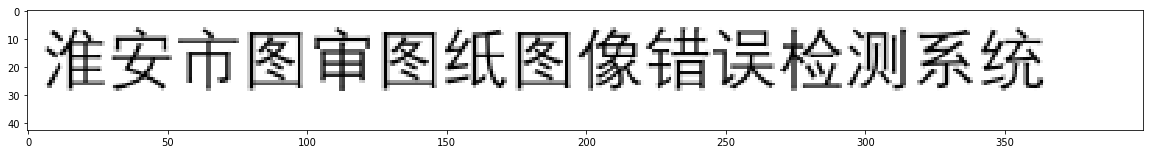

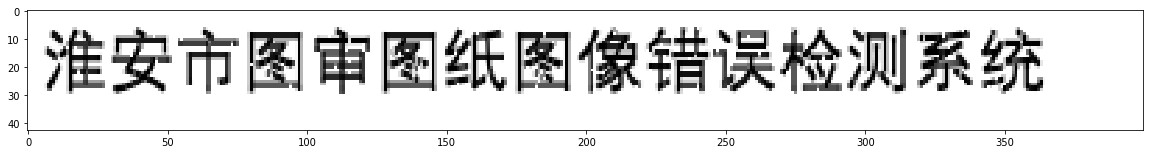

ttf/方正书宋_GBK.ttf


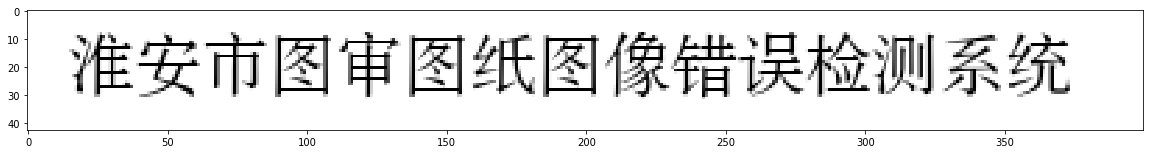

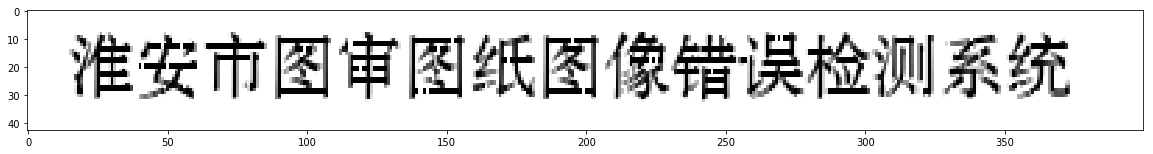

ttf/方正书宋简体.ttf


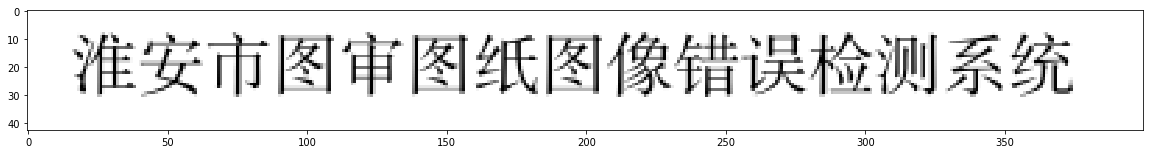

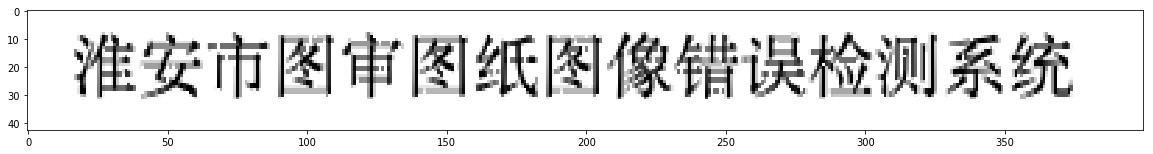

ttf/方正仿宋_GBK.ttf


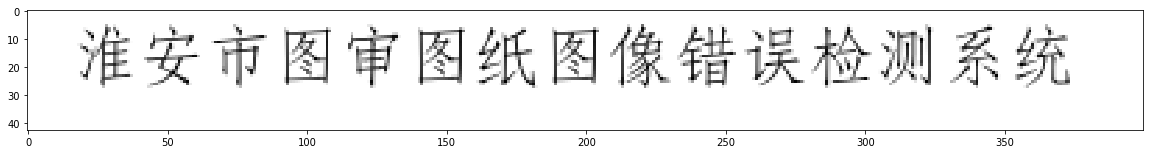

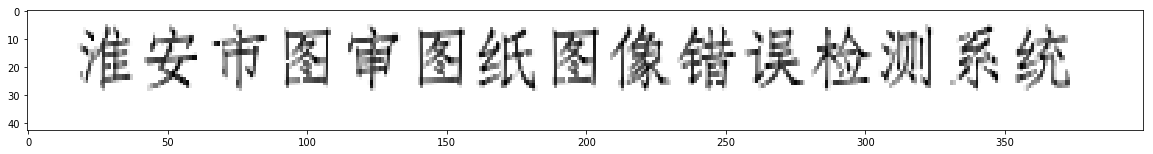

ttf/方正兰亭粗黑_GBK.TTF


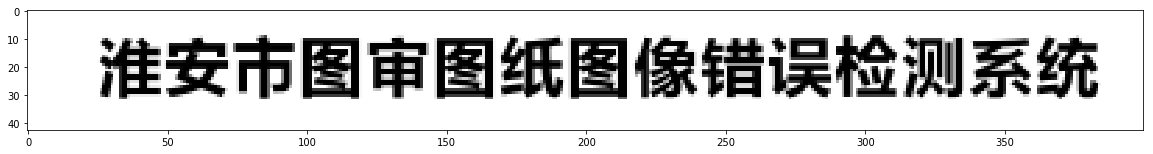

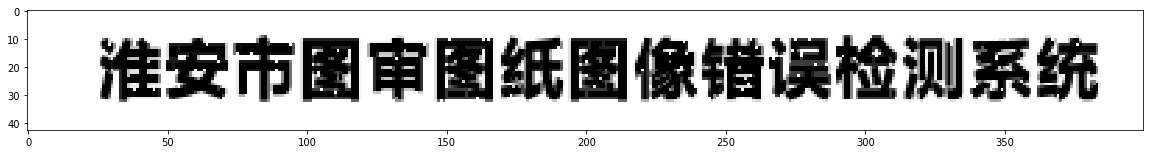

ttf/方正准圆简体.ttf


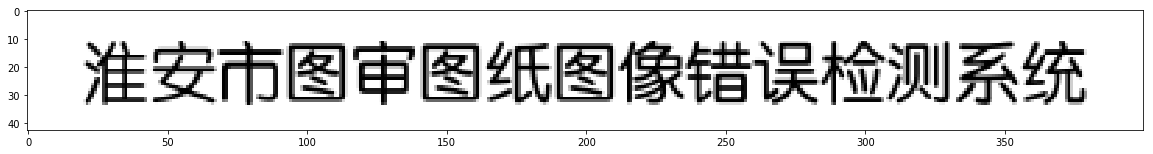

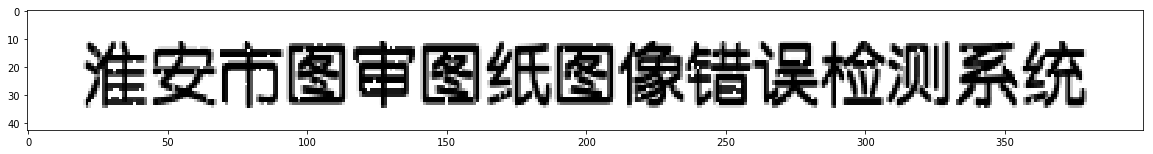

ttf/方正喵呜体.ttf


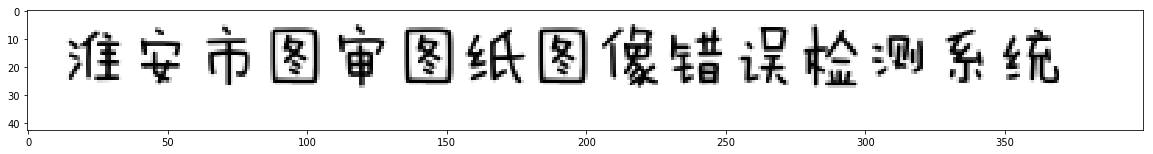

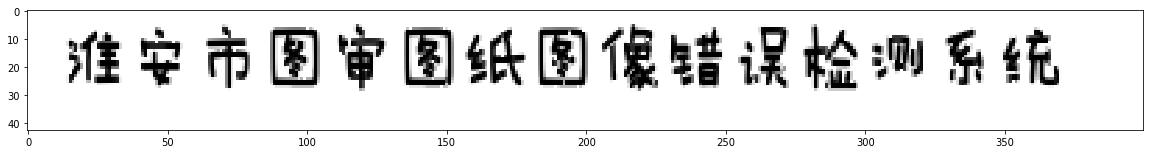

ttf/方正大标宋简体.ttf


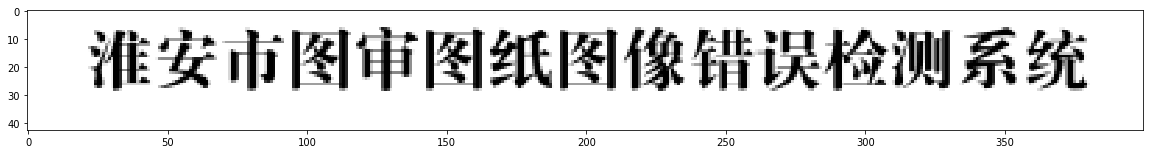

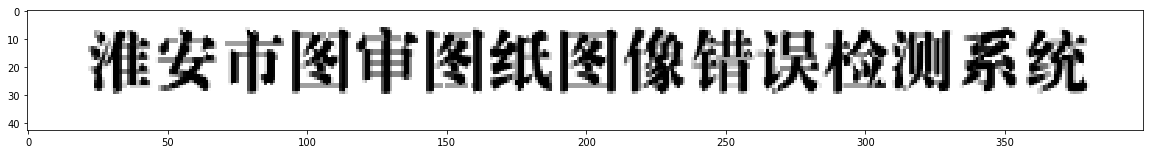

ttf/方正大草简体.TTF


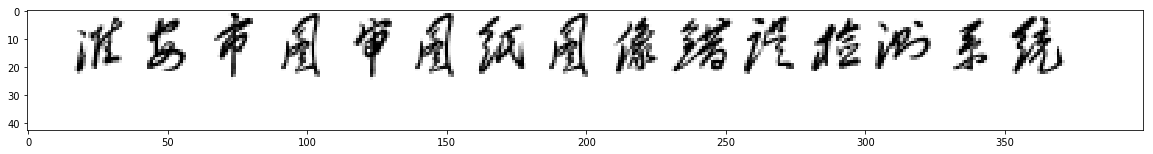

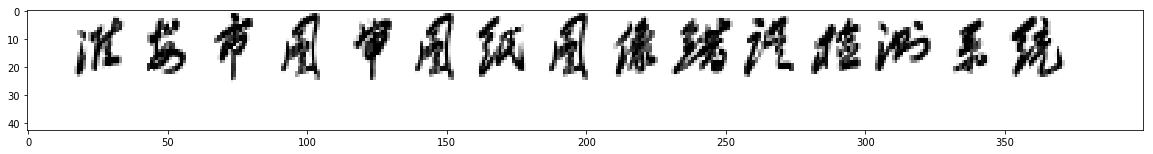

ttf/方正大黑简体.ttf


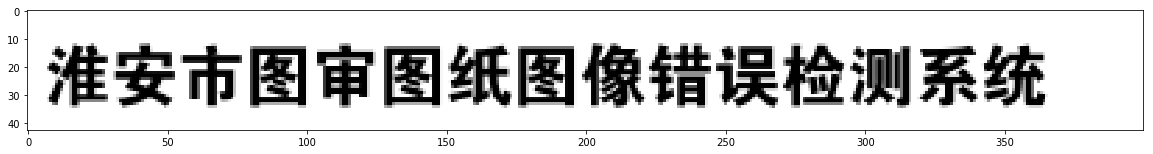

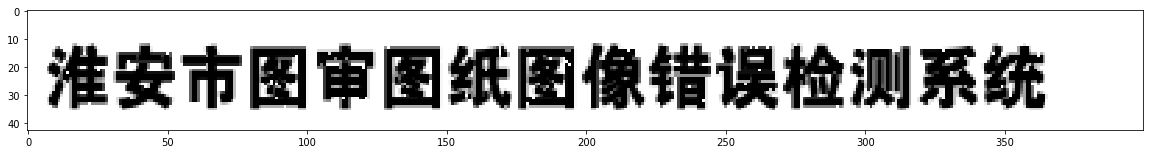

ttf/方正字迹 - 邢体草书简体.ttf


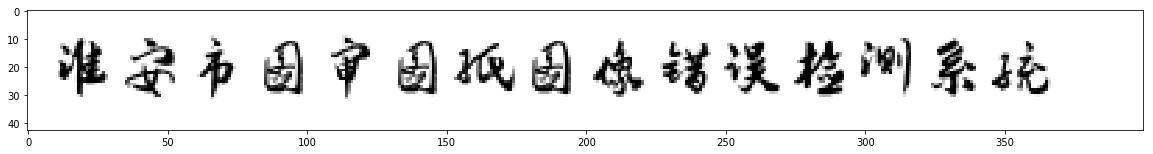

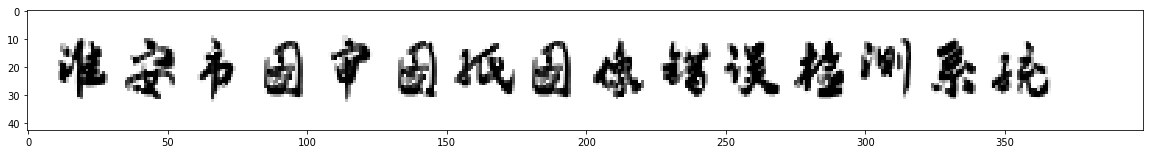

ttf/方正字迹 - 邢体草书繁体.ttf


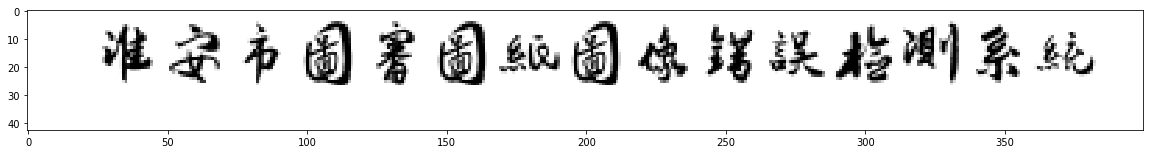

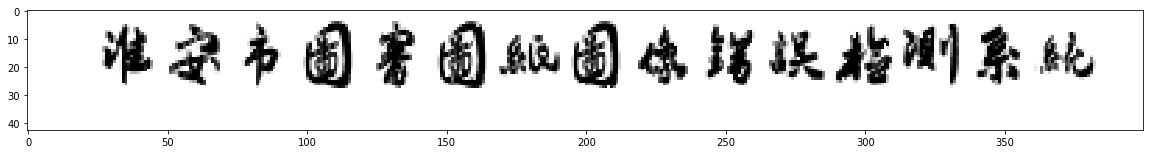

ttf/方正宋黑简体.ttf


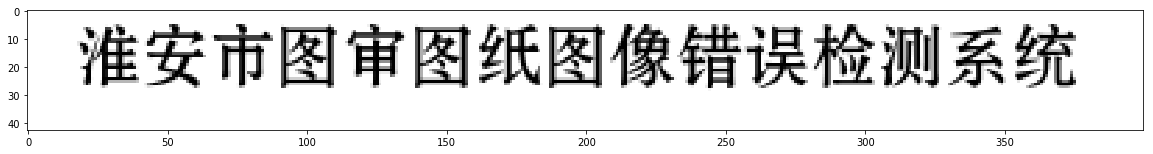

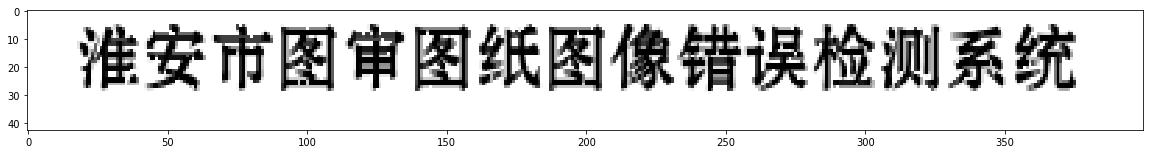

ttf/方正小标宋_GBK.ttf


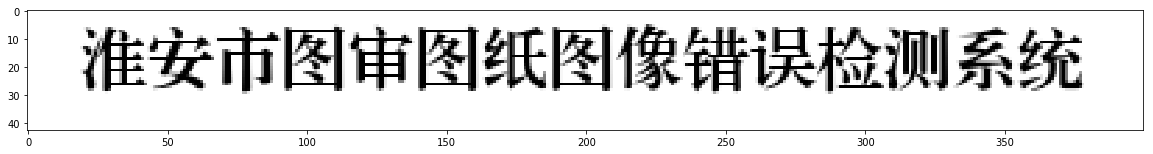

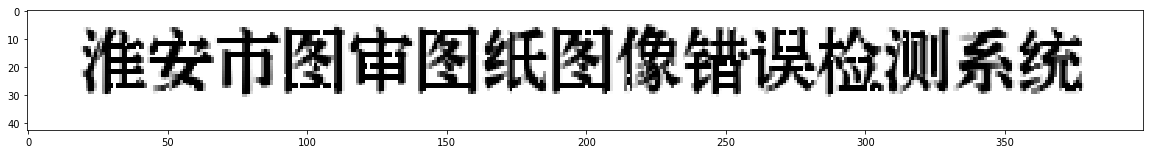

ttf/方正报宋_GBK.TTF


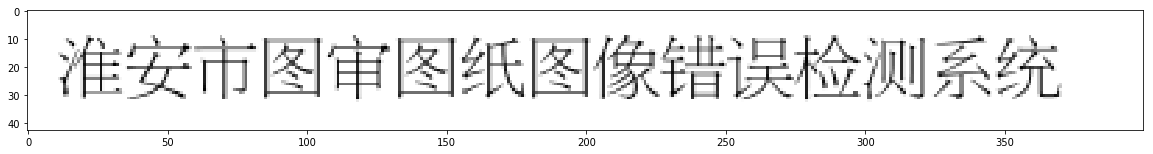

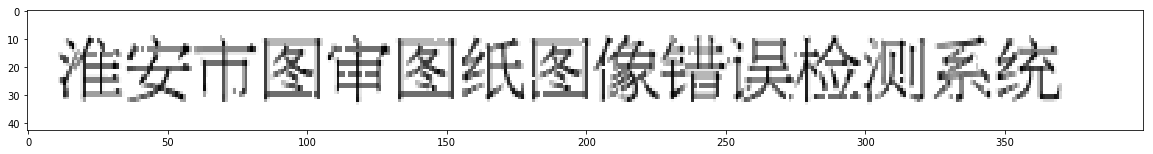

ttf/方正楷体_GBK.ttf


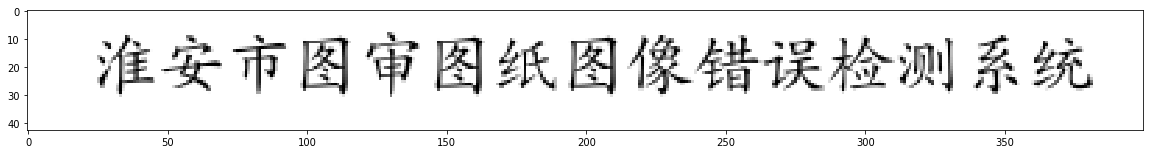

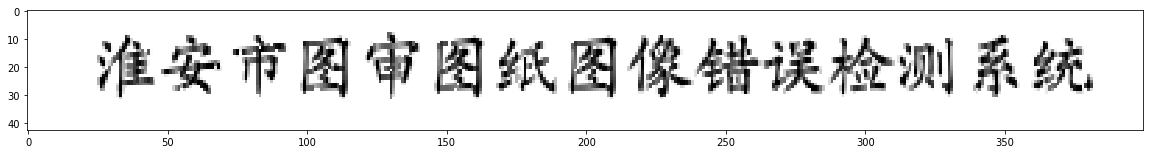

ttf/方正楷体简体.ttf


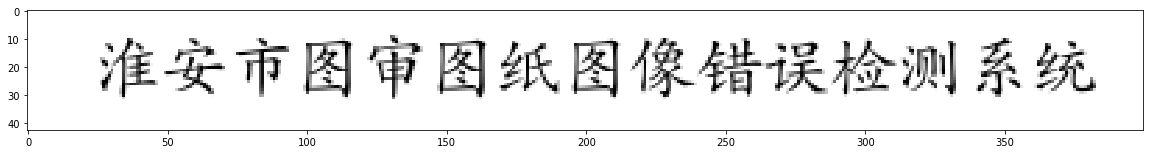

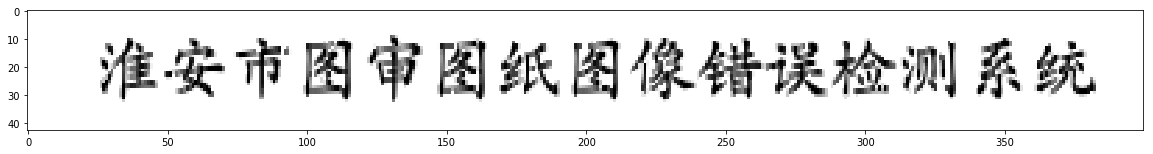

ttf/方正正大黑简体.TTF


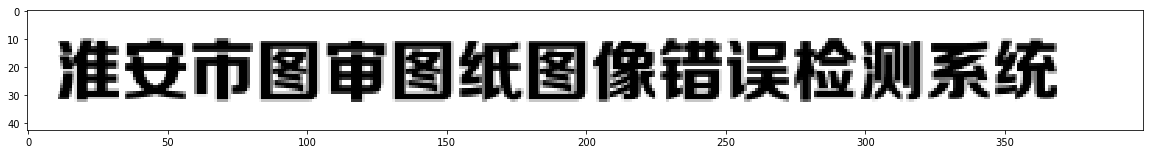

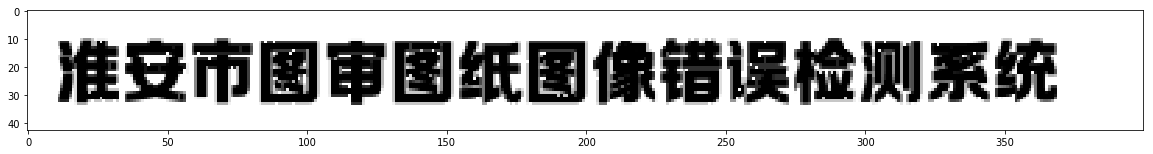

ttf/方正汉真广标简体.TTF


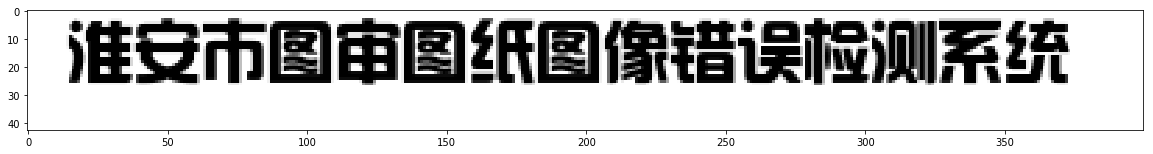

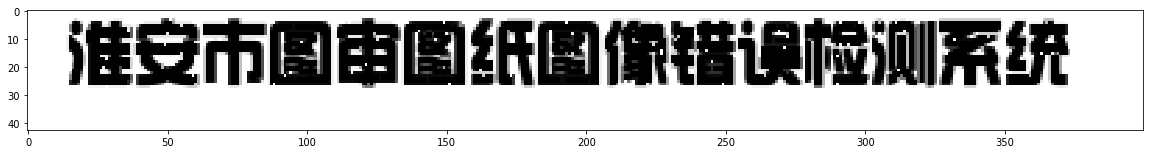

ttf/方正琥珀简体.ttf


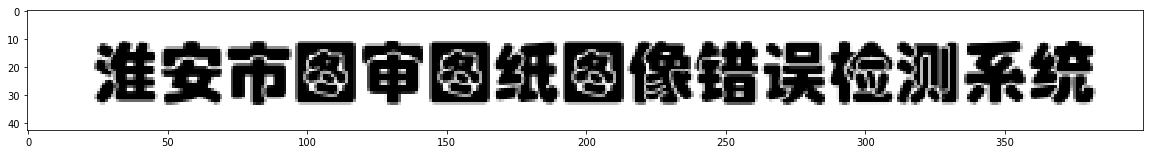

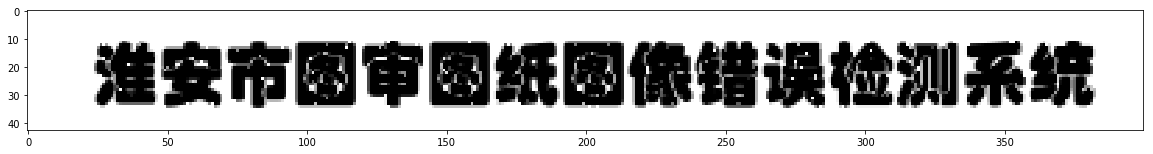

ttf/方正粗倩简体.TTF


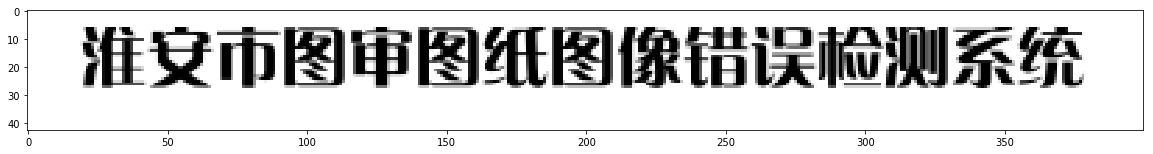

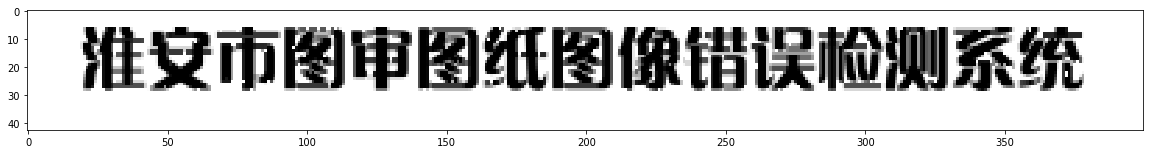

ttf/方正粗谭黑简体.TTF


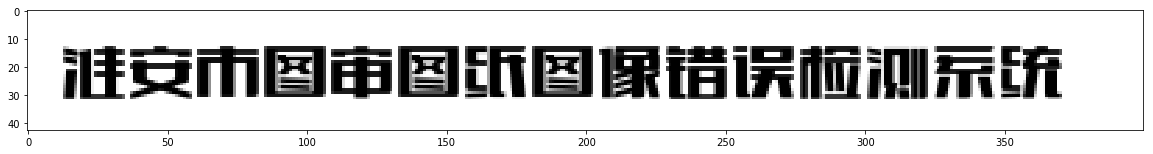

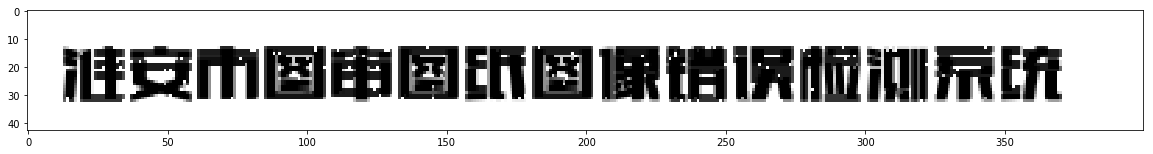

ttf/方正细圆简体.ttf


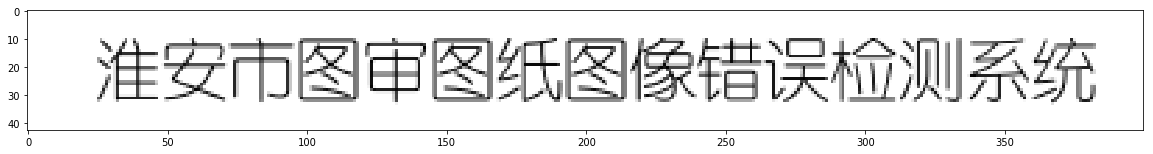

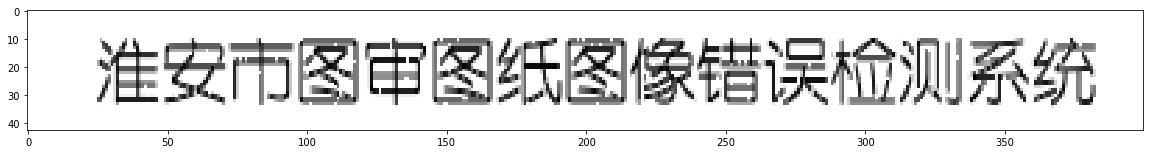

ttf/方正综艺简体.ttf


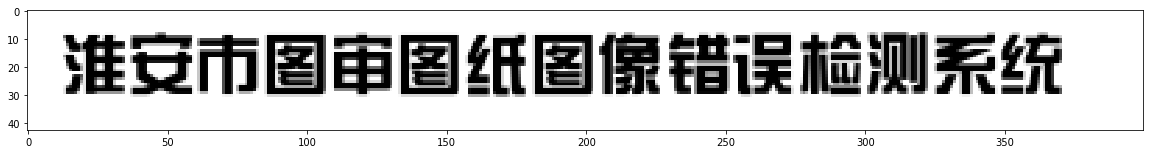

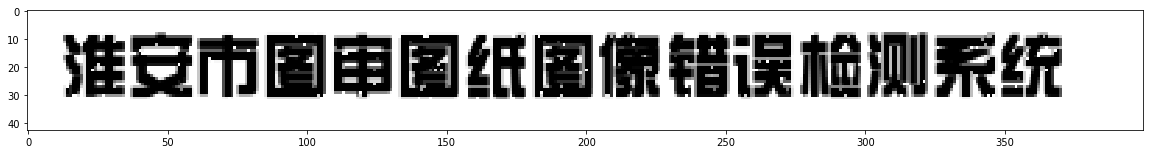

ttf/方正美黑_GBK.ttf


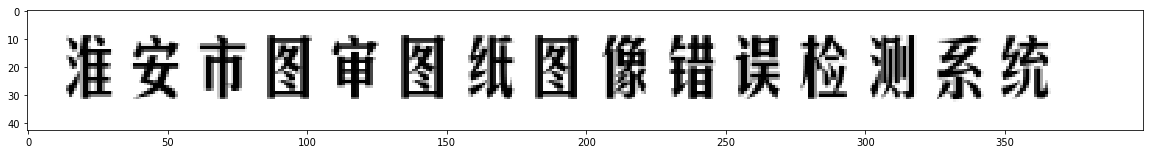

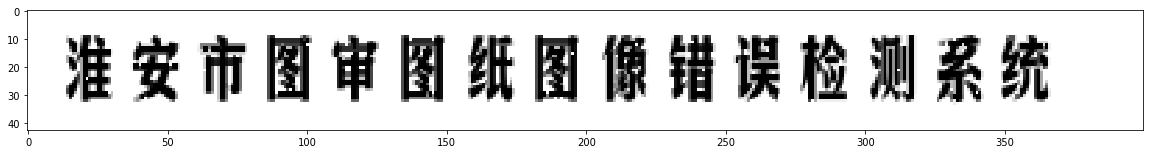

ttf/方正行楷简体.ttf


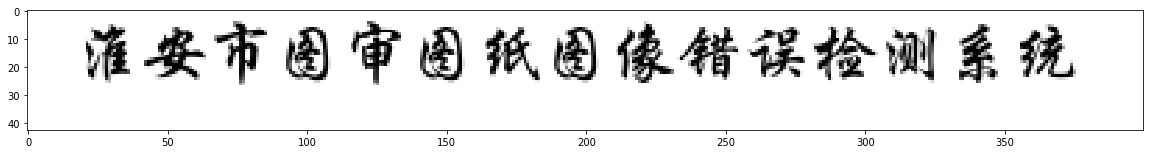

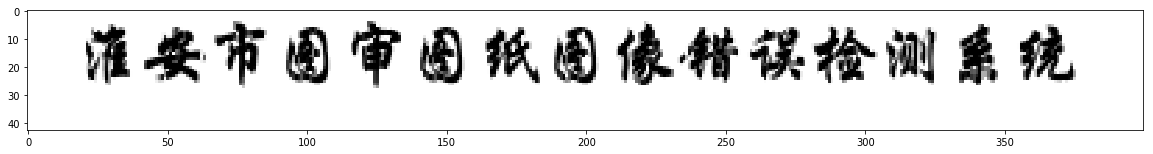

ttf/方正隶书_GBK.ttf


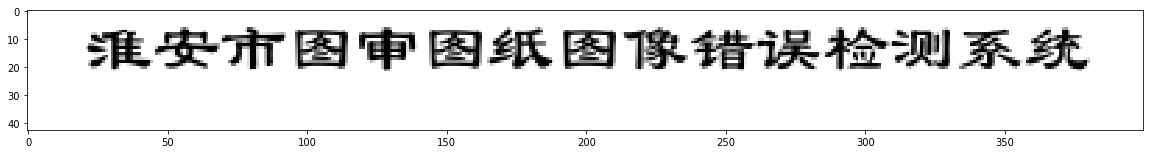

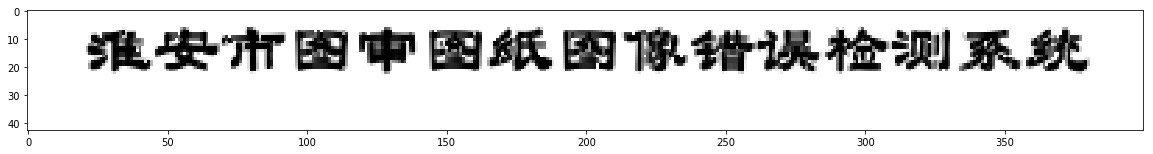

ttf/方正隶书简体.ttf


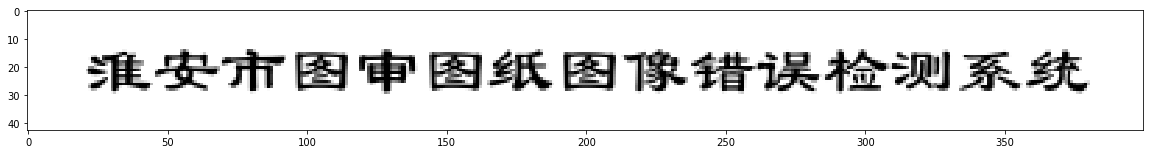

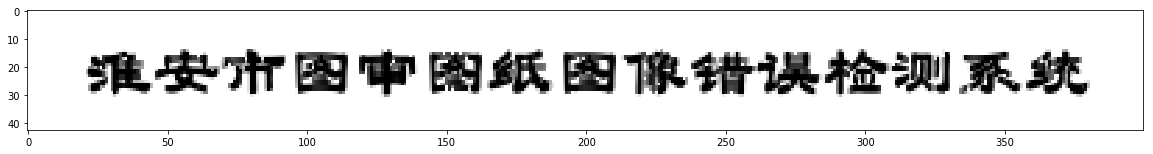

ttf/方正魏碑_GBK.ttf


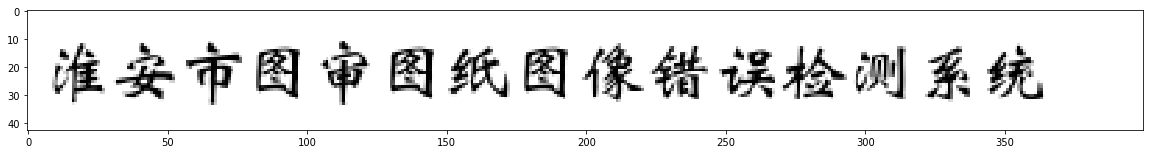

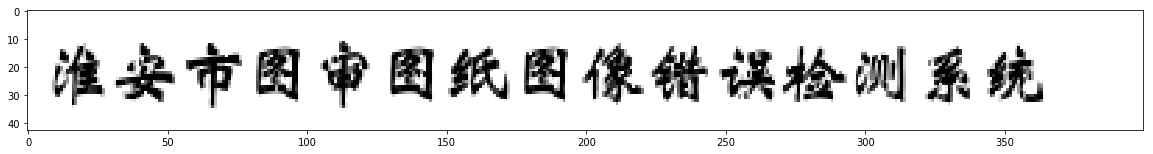

ttf/方正魏碑简体.ttf


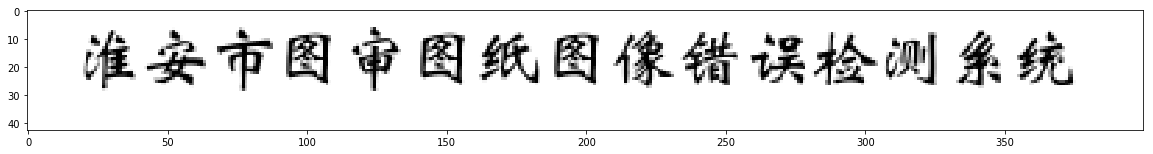

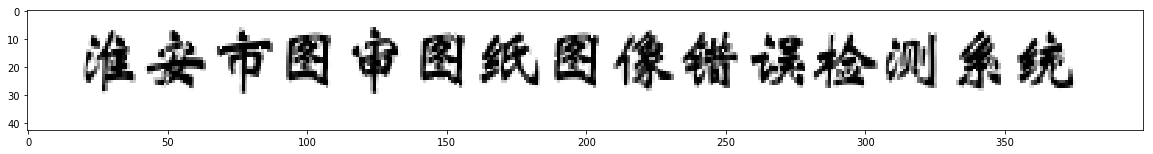

ttf/方正黑体简体.TTF


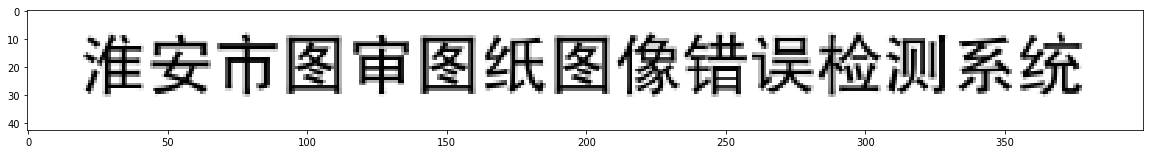

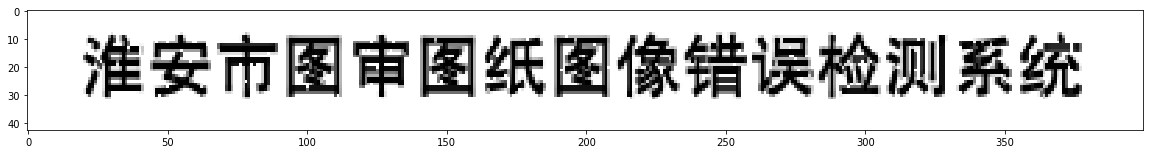

ttf/时尚中黑简体.ttf


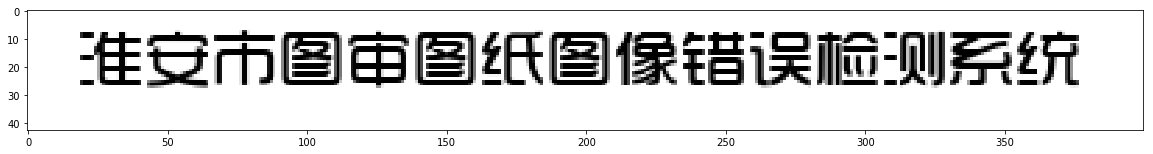

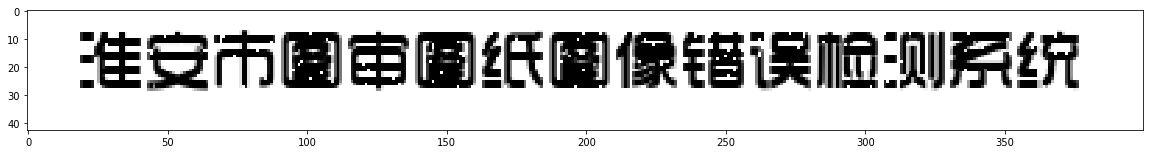

ttf/李旭科毛笔行书.ttf


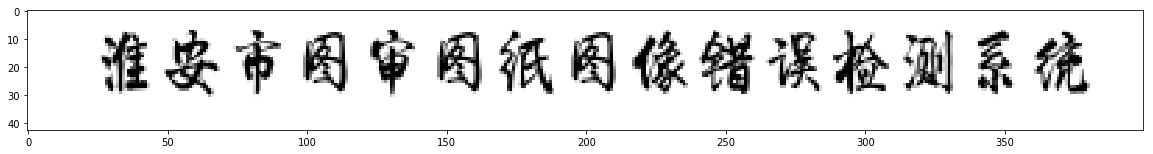

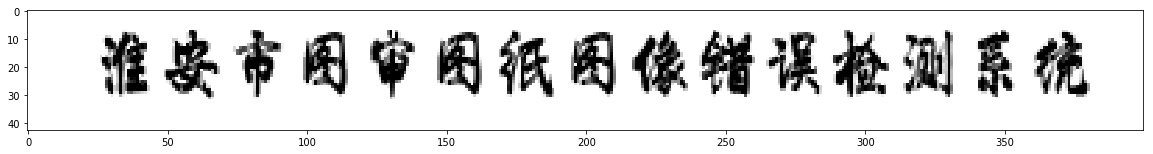

ttf/梁秋生书法字体.ttf


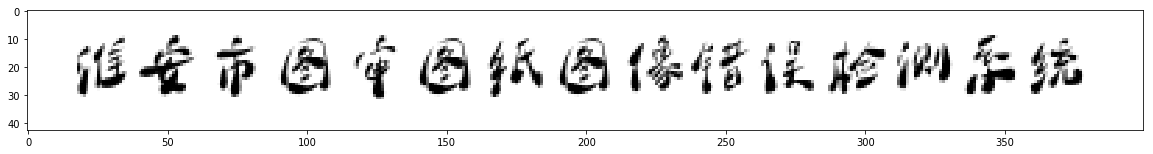

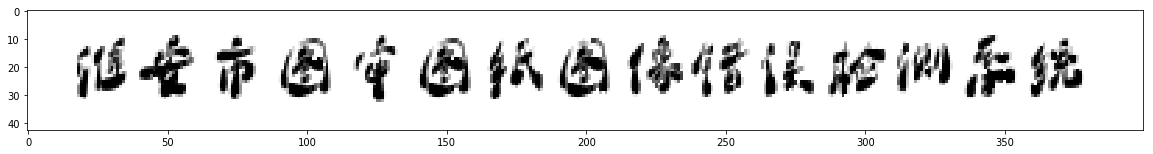

ttf/毛泽东字体.ttf


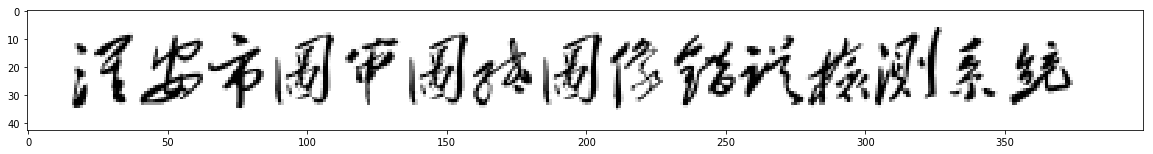

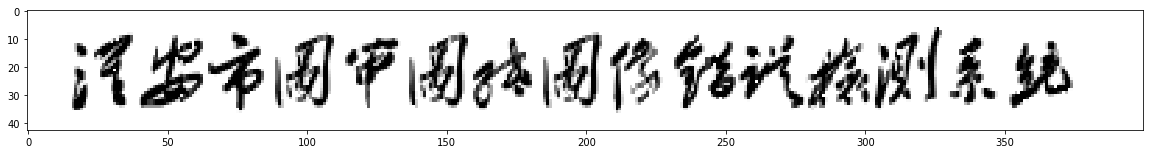

ttf/王金彦简行书完善体.ttf


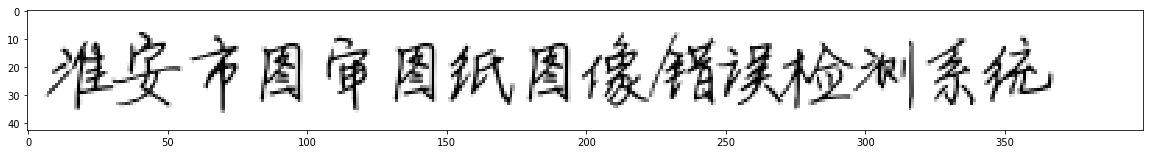

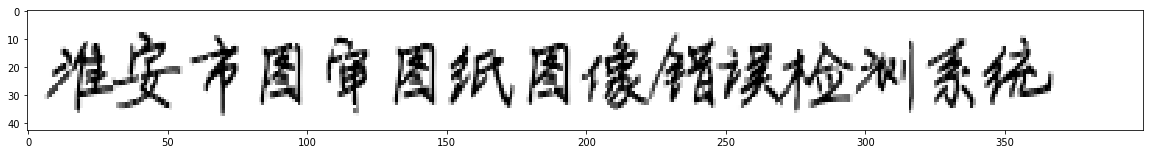

ttf/简硬笔楷书.TTF


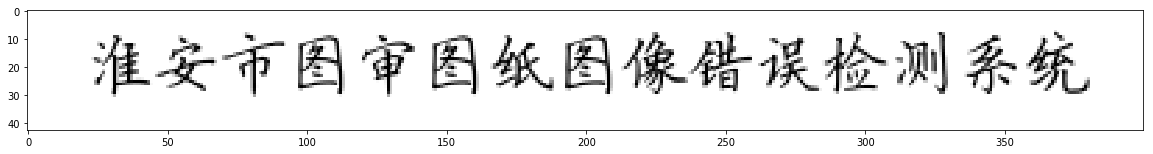

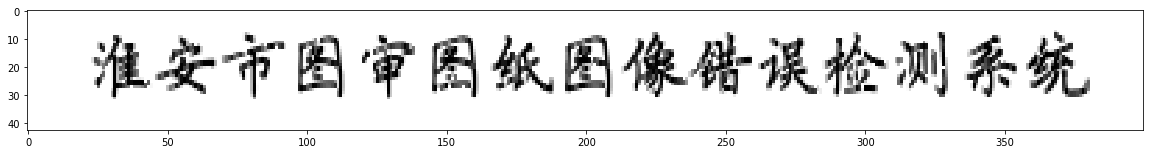

ttf/简硬笔行书.TTF


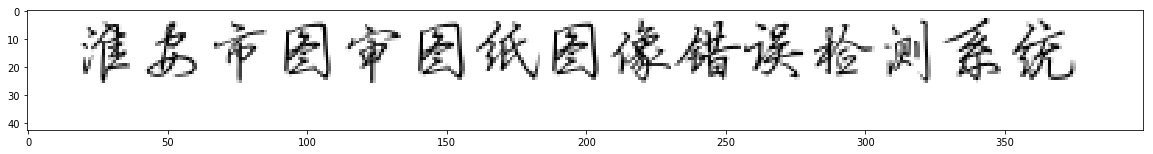

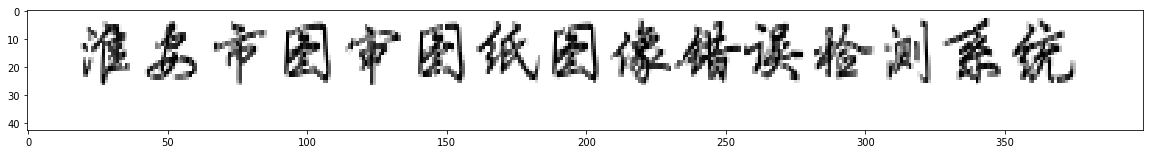

ttf/米芾体.ttf


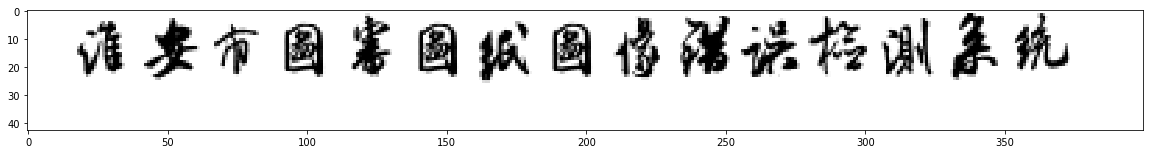

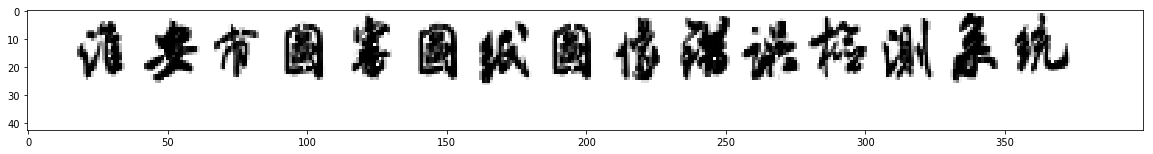

ttf/苏新诗鼠标行书简.ttf


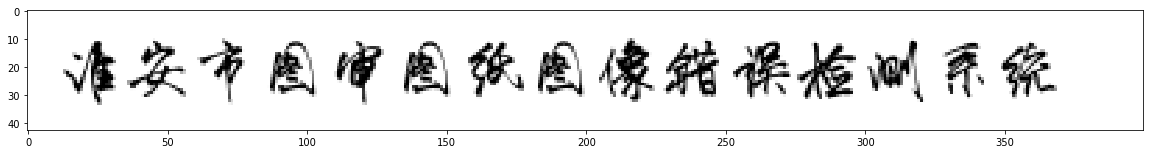

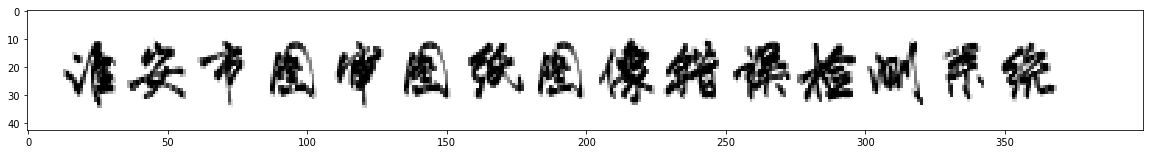

ttf/钟齐志莽行书.ttf


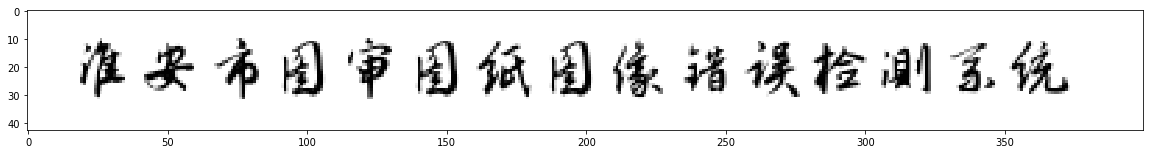

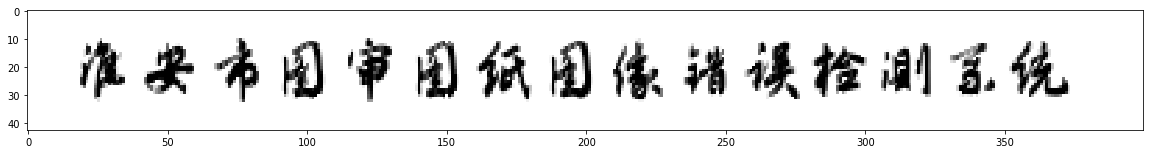

ttf/钟齐李洤标准草书符号.ttf


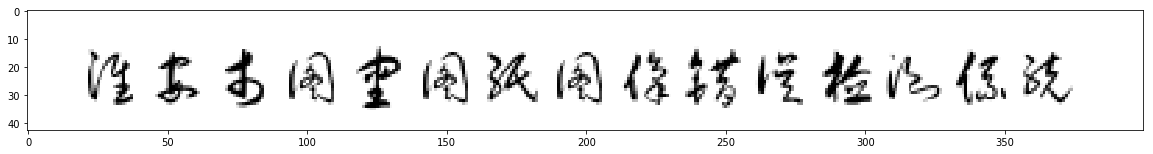

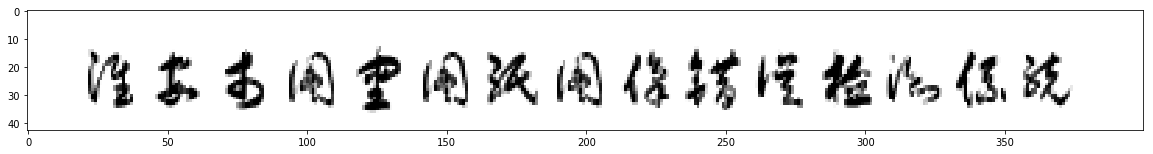

ttf/钟齐流江毛笔草体.ttf


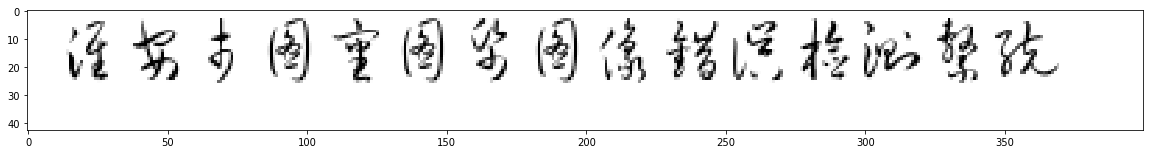

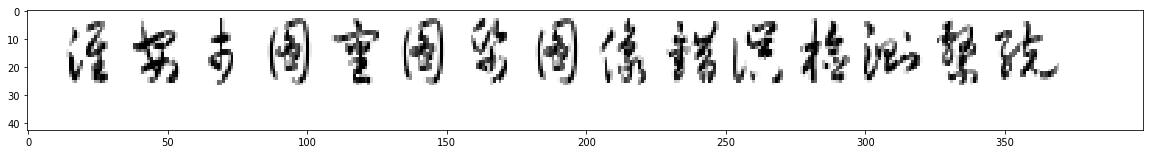

ttf/钟齐王庆华毛笔简体.TTF


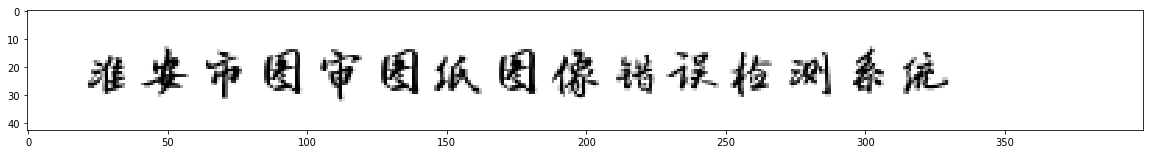

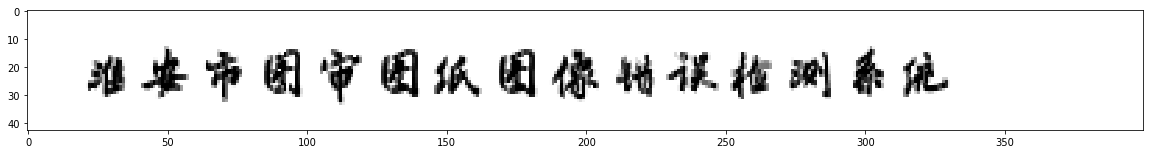

In [16]:
fontslist=open('./ttf.lst')
fontarr=[]
for line in fontslist.readlines():
    print(line.split('\n')[0])
    fontarr.append(ImageFont.truetype(line.split('\n')[0], 24))
    image = Image.new("RGB", (400, 43), (255, 255, 255))
    image = gen_one_img(image, "淮安市图审图纸图像错误检测系统", -1)
    image = np.array(image)
    plt.figure(figsize=(20,5))
    plt.imshow(image)
    plt.show()
    jiazaosheng(image, (255, 255, 255), 0.05)
    image = cv2.erode(image, np.ones([2,1]), 1)
    plt.figure(figsize=(20,5))
    plt.imshow(image)
    plt.show()

In [11]:
#读取文件表
fontslist=open('./ttf.lst')
fontarr=[]
for line in fontslist.readlines():
    for i in range(16, 24, 2):
        fontarr.append(ImageFont.truetype(line.split('\n')[0], i))
wenziarr=[]
cut_zhuanzhe = lambda t: t.split('\n')[0]
wenziarr = list(map(cut_zhuanzhe, open('./最新字典3_只含常用字.csv',encoding='utf8').readlines()[0].split(',')))
# wenziarr.remove(wenziarr[0])
wenziarr.append(',')
word2idx = {}
idx2word = {}
word2idx[' '] = 0
idx2word[0] = ' '
for idx, word in enumerate(wenziarr):
    word2idx[wenziarr[idx]] = idx + 1
    idx2word[idx + 1] = wenziarr[idx]
print(len(word2idx),word2idx)
max_idx = 0
for idx in idx2word:
    if idx > max_idx:
        max_idx = idx

1804 {' ': 948, 'q': 1, 'w': 2, 'e': 3, 'r': 4, 't': 5, 'y': 6, 'u': 7, 'i': 8, 'o': 9, 'p': 10, 'a': 11, 's': 12, 'd': 13, 'f': 14, 'g': 15, 'h': 16, 'j': 17, 'k': 18, 'l': 19, 'z': 20, 'x': 21, 'c': 22, 'v': 23, 'b': 24, 'n': 25, 'm': 26, 'Q': 27, 'W': 28, 'E': 29, 'R': 30, 'T': 31, 'Y': 32, 'U': 33, 'I': 34, 'O': 35, 'P': 36, 'A': 37, 'S': 38, 'D': 39, 'F': 40, 'G': 41, 'H': 42, 'J': 43, 'K': 44, 'L': 45, 'Z': 46, 'X': 47, 'C': 48, 'V': 49, 'B': 50, 'N': 51, 'M': 52, '`': 53, '1': 54, '2': 55, '3': 56, '4': 57, '5': 58, '6': 59, '7': 60, '8': 61, '9': 62, '0': 63, '-': 64, '=': 65, '~': 66, '!': 67, '@': 68, '#': 69, '$': 70, '%': 71, '^': 72, '&': 73, '*': 74, '(': 75, ')': 76, '_': 77, '+': 78, '\\': 79, ']': 80, '[': 81, '{': 82, '}': 83, '|': 84, "'": 85, ';': 86, ':': 87, '"': 88, '.': 89, '/': 90, '<': 91, '>': 92, '《': 93, '》': 94, '?': 95, '': 96, '金': 97, '注': 98, '意': 99, '母': 100, '排': 101, '连': 102, '续': 103, '性': 104, '负': 105, '放': 106, '气': 107, '孔': 108, '轴': 109, '心

In [12]:
def gen_one_img(image, text, idx):
    dr = ImageDraw.Draw(image)
    pianyix=random.randint(5,25)
    pianyiy=random.randint(1,10)
    font = fontarr[idx]
    dr.text((pianyix,pianyiy), text, font=font, fill="#000000")
    return image

In [5]:
cut_pdf_all_word = pickle.load(open('./文字处理/cut_pdf_all_word.pkl', 'rb'))

In [6]:
def gen_text(length, cut_pdf_all_word, idx):
#     min(length, len(cut_pdf_all_word))
    output = list(cut_pdf_all_word[idx:idx+min(length, len(cut_pdf_all_word))-4])
    # 加两个随机生成的字符
    output += idx2word[random.randint(0, max_idx)]
    output += idx2word[random.randint(0, max_idx)]
    output += idx2word[random.randint(0, max_idx)]
    output += idx2word[random.randint(0, max_idx)]
    label = []
    for word in list(output):
        if word in word2idx:
            label.append(word2idx[word])
        else:
            output.remove(word)
    output = ''.join(output)
#     for i in range(length):
#         label.append(random.randint(0, len(wenziarr)-1))
#         output += idx2word[label[-1]]
    return output, label
def jiazaosheng(im,color,percent):
    width,height,_=im.shape
    for i in range(int(width*height*percent)):
        x=random.randint(0,width-1)
        y=random.randint(0,height-1)
        #print width,height,x,y
        im[x,y]=color
def cut_lines(img, jingxidu=50):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    y_sum = np.sum(gray, axis = 1)
    max_y = max(y_sum)
    min_y = min(y_sum)
    yuzhi = max_y - int((max_y - min_y) / jingxidu)
    start_y = []
    end_y = []
    for i in range(1, len(y_sum)):
        if y_sum[i] > yuzhi and y_sum[i-1] < yuzhi:
            end_y.append(i)
        if y_sum[i] < yuzhi and y_sum[i-1] > yuzhi:
            start_y.append(i)
    output = []
    if len(start_y) == len(end_y):
        for i in range(len(start_y)):
            output.append([start_y[i], end_y[i]])
    return output

In [7]:
def one_process(length, start_idx, jia=False, word_idx = 0):
    for i in range(start_idx+1, start_idx+length):
        if word_idx > len(cut_pdf_all_word) - 14:
            word_idx = 0
        word_length = random.randint(8, 14)
        text, label = gen_text(word_length, cut_pdf_all_word, word_idx)
        word_idx += word_length
        image = Image.new("RGB", (420, 40), (255, 255, 255))
        image = gen_one_img(image, text, random.randint(0, len(fontarr)-1))
        image = np.array(image)
        if jia == True:
            jiazaosheng(image, (255, 255, 255), 0.05)
#         if i % 4 == 1:
#             if i % 3 == 0:
#                 image = cv2.erode(image, np.ones([1,2]), 1)
#             else:
#                 image = cv2.erode(image, np.ones([2,1]), 1)
#         if i % 5 == 2:
#             if i % 3 == 0:
#                 image = cv2.dilate(image, np.ones([1, 2]), 1)
#             else:
#                 image = cv2.dilate(image, np.ones([2,1]), 1)
        output = cut_lines(image)
        if len(output) != 1:
            print('one wrong')
            continue
        img = image[output[0][0]:output[0][1],:,:]
        h, w, _ = img.shape
        bili = 30 * 1.0 / h
        aim_h = 30
        aim_w = int(bili * w)
        img = cv2.resize(img, (aim_w, aim_h))
        h, w, _ = img.shape
        newimg = np.ones([40, 805, 3], np.uint8) * 255
        if w> 805:
            continue
        newimg[5:35,:w,:] = img
#         plt.imshow(newimg)
#         plt.show()
        filename = "./images/img_"
        filename += '-'.join(list(map(str, label)))
        filename += "_"+str(i)+'.jpg'
        cv2.imwrite(filename, newimg)

def one_process2(jia=False, word_idx = 0, length = int(len(cut_pdf_all_word) / 14)):
    start_idx = 0
    
    
    for i in range(start_idx+1, start_idx+length):
        if word_idx > len(cut_pdf_all_word) - 14:
            word_idx = 0
        word_length = random.randint(18, 19)
        text, label = gen_text(word_length, cut_pdf_all_word, word_idx)
        word_idx += word_length
        image = Image.new("RGB", (590, 40), (255, 255, 255))
        image = gen_one_img(image, text, random.randint(0, len(fontarr)-1))
        image = np.array(image)
        if jia == True:
            jiazaosheng(image, (255, 255, 255), 0.05)
        output = cut_lines(image)
        if len(output) != 1:
            print('one wrong')
            continue
        img = image[output[0][0]:output[0][1],:,:]
        h, w, _ = img.shape
        bili = 30 * 1.0 / h
        aim_h = 30
        aim_w = int(bili * w)
        img = cv2.resize(img, (aim_w, aim_h))
        h, w, _ = img.shape
        newimg = np.ones([43, 805, 3], np.uint8) * 255
        if w> 805:
            continue
        newimg[5:35,:w,:] = img
#         plt.imshow(newimg)
#         plt.show()
        filename = "./images/img_"
        filename += '-'.join(list(map(str, label)))
        filename += "_"+str(i)+'.jpg'
        cv2.imwrite(filename, newimg)

In [13]:
one_process2(False)

one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


In [15]:
for idx in [110, 120, 130, 140, 150, 160, 170, 180, 190, 200]:
    processes = []
    for i in range(idx, idx+10, 2):
        processes.append(Process(target=one_process, args=(5000, i*20000, True,i * 14* 20000)))
        processes.append(Process(target=one_process, args=(20000, (i+1)*20000, False,(i+1) * 14* 20000)))
    for i in range(len(processes)):
        processes[i].start()
    for i in range(len(processes)):
        processes[i].join()

one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong
one wrong


In [9]:
import pickle
pickle.dump(word2idx, open('word2idx3.pkl', 'wb'))
pickle.dump(idx2word, open('idx2word3.pkl', 'wb'))

In [10]:
for i in [302,414,722,302,177,414,722]:
    print(idx2word[i])

电
系
统
电
力
系
统
